## Data to be used

In [ ]:
data = [
    [0.7788450310102792, 0.5209669708701872, 0.4044083545879488],
    [0.8179565291047595, 0.4795004917565935, 0.5956795583678054],
    [0.5106489106823650, 0.6706565792766745, 0.5555357737975284],
    [0.0852559316591041, 0.3296512169208131, 0.4445430880027393],
    [0.2820931813897727, 0.6185973563611613, 0.4004162826744736],
    [0.3145468870530589, 0.3816731528758461, 0.5994843800082658],
    [0.0105403982874326, 0.6925545272015793, 0.6303201807782194],
    [0.5856777553477145, 0.3080187355714175, 0.3697472451327424]
]


## Find and plot best fit plane calculated from SVD

Centroid: [3.25 5.5  3.25]
Normal to the best-fit plane: [ 0.80934465 -0.49805825 -0.3112864 ]


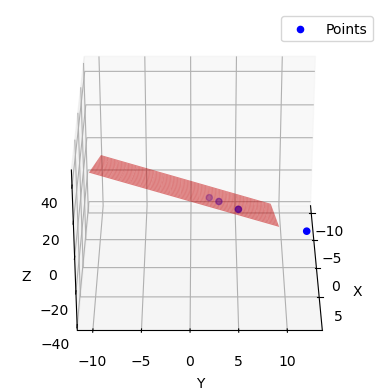

In [51]:
import numpy as np

def best_fit_plane(points):
    # Step 1: Collect points into a NumPy array
    points = np.array(points)

    # Step 2: Compute the centroid
    centroid = np.mean(points, axis=0)

    # Step 3: Center the points
    centered_points = points - centroid

    # Step 4: Apply SVD
    U, S, Vt = np.linalg.svd(centered_points)

    # Extract principal directions (right singular vectors)
    v1 = Vt[0]  # First principal direction
    v2 = Vt[1]  # Second principal direction

    # Step 5: Extract the normal to the plane
    normal = Vt[-1]

    point_on_plane = centroid + v1 + v2

    return centroid, normal, point_on_plane

# Example usage:
points = [
    [1, 2, 3],
    [4, 5, 6],
    [6,12,0],
    [2, 3, 4]
]

centroid, normal, point_on_plane = best_fit_plane(points)
print(f"Centroid: {centroid}")
print(f"Normal to the best-fit plane: {normal}")

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_plane_and_points(points, centroid, normal):
    # Create a grid of points for the plane
    d = -centroid.dot(normal)
    xx, yy = np.meshgrid(range(-10, 10), range(-10, 10))
    zz = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

    # Plot the points
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='b', label='Points')

    # Plot the plane
    ax.plot_surface(xx, yy, zz, alpha=0.5, color='r')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=30, azim=0)
    plt.legend()
    plt.show()

# Example usage:
points = np.array(points)  # Ensure points is a NumPy array
plot_plane_and_points(points, centroid, normal)


## Translate plane from one point to another

In [9]:
import numpy as np

def translate_plane(normal, point_original, point_new):
    """
    Translate a plane from point_original to point_new.

    Parameters:
    - normal: A tuple or list with the normal vector (a, b, c) of the plane.
    - point_original: A tuple or list with the coordinates (x0, y0, z0) of the original point on the plane.
    - point_new: A tuple or list with the coordinates (x1, y1, z1) of the new point through which the plane should pass.

    Returns:
    - A tuple (a, b, c, d') representing the new plane equation.
    """

    # Extract normal vector components
    a, b, c = normal

    # Compute the new d' constant
    x1, y1, z1 = point_new
    d_prime = -(a * x1 + b * y1 + c * z1)

    return (a, b, c, d_prime)

# Example usage:
normal = (1, -2, 3)           # Example normal vector
point_original = (1, 2, 3)    # Original point on the plane
point_new = (4, 5, 6)         # New point through which the plane should pass

new_plane = translate_plane(normal, point_original, point_new)
print(f"New plane equation: {new_plane[0]}x + {new_plane[1]}y + {new_plane[2]}z + {new_plane[3]} = 0")


New plane equation: 1x + -2y + 3z + -12 = 0


## Plotting a point at the end of a vector whose length is scalable

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def get_scaled_vector(base_point, vector, scale):
    """
    Plot a point at the end of a scaled vector in 3D space.

    Parameters:
    - base_point: The starting point of the vector (a tuple or list of x, y, z).
    - vector: The direction of the vector (a tuple or list of x, y, z).
    - scale: The scaling factor for the vector length.
    """
    # Convert base_point and vector to NumPy arrays
    base_point = np.array(base_point)
    vector = np.array(vector)
    
    # Scale the vector
    scaled_vector = scale * vector
    
    # Calculate the end point of the scaled vector
    end_point = base_point + scaled_vector
    
    # # Plot the vector and the end point
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    
    # # Plot the vector
    # ax.quiver(base_point[0], base_point[1], base_point[2], 
    #           scaled_vector[0], scaled_vector[1], scaled_vector[2],
    #           color='b', arrow_length_ratio=0.1)
    
    # # Plot the end point
    # ax.scatter(end_point[0], end_point[1], end_point[2], color='g', s=50)
    
    # Set labels and show the plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

    return end_point

# Example usage
base_point = (0, 0, 0)  # Starting at the origin
vector = (1, 2, 3)      # Direction of the vector
scale = 2.0             # Scaling factor

get_scaled_vector(base_point, vector, scale)


array([2., 4., 6.])

## Averaging vectors

In [ ]:
def average_vectors(vector_list):
    

Average vector: [ 0.11681511 -0.60303486  4.91966178]


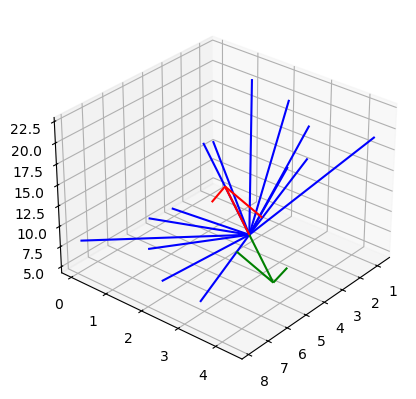

In [83]:
import numpy as np

def vector_from_points(point1, point2):
    """
    Returns the vector from point1 to point2.
    
    Parameters:
    point1 (array-like): Coordinates of the first point.
    point2 (array-like): Coordinates of the second point.
    
    Returns:
    numpy.ndarray: The vector from point1 to point2.
    """
    # Convert points to numpy arrays
    point1 = np.array(point1)
    point2 = np.array(point2)
    
    # Calculate the vector from point1 to point2
    vector = point2 - point1
    
    return vector

# Example usage:
point1 = [1, 2, 3]
point2 = [4, 6, 8]



import numpy as np

# Define the list of vectors
point = np.array([4.19995228, 2.76684512, 8.99307643])
other_points = np.array([[5.44386823, 0.64636038, 8.67471336],
[ 3.17506466,  3.7566395,  18.53580534],
[5.50309803, 0.64636038, 4.93054599],
[ 3.11583486,  3.7566395,  22.27997272],
[3.47758761, 2.12136534, 6.70875339],
[ 5.14134527,  2.28163454, 20.50176532],
[7.46937864, 2.12136534, 6.89650597],
[ 1.14955425,  2.28163454, 20.31401274],
[ 4.41898061,  1.63615475, 18.21744227],
[6.74701397, 2.76684512, 4.61218292],
[ 1.87191891,  1.63615475, 22.59833579],
[3.12979736, 0.0343434,  5.47203531],
[ 5.48913552,  4.36865648, 21.73848339],
[7.81716889, 0.0343434,  8.13322404],
[ 0.801764,    4.36865648, 19.07729467]])

vectors = []
for p in other_points:
    vectors.append(vector_from_points(point, p))

vectors = np.array(vectors)    

# Calculate the average vector
average_vector = np.mean(vectors, axis=0)

print("Average vector:", average_vector)

 # Plot the vector and the end point
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
    
# Plot the vectors
for o in other_points:
    ax.plot([point[0],o[0]],[point[1],o[1]],[point[2],o[2]], color='b')

# plot the average vector
ax.quiver(point[0],point[1],point[2],average_vector[0],average_vector[1],average_vector[2], color='r', arrow_length_ratio=0.5)
# plot the negative of the average vector
ax.quiver(point[0],point[1],point[2],average_vector[0]*-1,average_vector[1]*-1,average_vector[2]*-1, color='g', arrow_length_ratio=0.5)

ax.view_init(elev=30,azim=40)


## Putting it all together

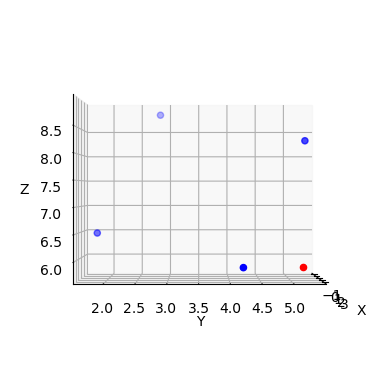

[0.22776481 5.56539602 4.87006926]
[0.45174808 2.11117992 7.95861121]
[-1.53816578  5.36499741  8.40699633]
[1.96760796 1.78131484 4.55515984]


In [66]:
data = [[3.373105659, 4.210621729, 5.891217785],
    [-1.045270680, 2.827667663, 8.844194273],
    [1.695089667, 5.254273802, 8.262145526],
    [0.632745233, 1.784015244, 6.473266532],
    [1.051925735, 5.246252746, 5.823435052],
    [1.275909001, 1.792036646, 8.911977006],
    [-0.588969448, 5.310986148, 9.293624267],
    [2.916804290, 1.727303590, 5.441787791]]

data_np = np.array(data)

visited = []
Ag = np.array(data[:4])
S = data[4:]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Ag[:, 0], Ag[:, 1], Ag[:, 2], color='b', label='Points')

for point in S: # visiting the chalcogens
    if point not in visited: 
        point_np = np.array(point)
        ax.scatter(point_np[0], point_np[1], point_np[2], color='r', label='Points')
        ax.view_init(elev=0, azim=0)

        # get SVD plane for all points except the point currently being visited
        other_points = [p for p in data if p!= point]
        centroid, normal, point_on_plane = best_fit_plane(other_points)

        # plot a hydrogen at the end of the vector starting from the chalcogen
        end_point = get_scaled_vector(point, normal, 1.3)
        print(end_point)
        ax.scatter(end_point[0], end_point[1], end_point[2], color='g')

        visited.append(point) # mark as visited

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()




## Gathering all the chalcogens, metals, and H-points to plot
(It works!! Hooray!)

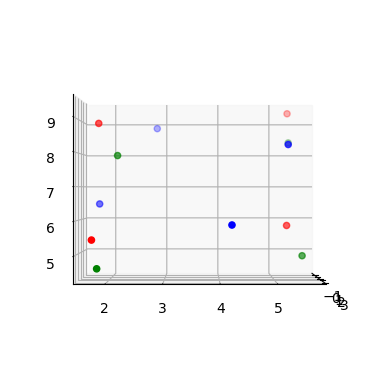

In [71]:
end_point = np.array([ #hydrogens to be plotted
    [0.22776481, 5.56539602, 4.87006926],
    [0.45174808, 2.11117992, 7.95861121],
    [-1.53816578, 5.36499741, 8.40699633],
    [1.96760796, 1.78131484, 4.55515984]
])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
S = np.array(S)
ax.scatter(Ag[:,0], Ag[:,1], Ag[:,2], color='b')
ax.scatter(S[:,0], S[:,1], S[:,2], color='r')
ax.scatter(end_point[:,0], end_point[:,1], end_point[:,2], color='g')
ax.view_init(elev=0, azim=0)
plt.show()